<img src="../static/IEEE_logo.png" alt="AeroPython" style="width: 300px;"/>

# Visualización con matplotlib

_Después de estudiar la sintaxis de Python y empezar a manejar datos numéricos de manera un poco más profesional, ha llegado el momento de visualizarlos. Con la biblioteca **matplotlib** podemos crear gráficos de muy alta calidad y altamente personalizables._

_**matplotlib** es una biblioteca muy potente que requiere tiempo de práctica para dominarla. Vamos a empezar por lo más sencillo._

## ¿Qué es matplotlib?

* Estándar *de facto* para visualización en Python
* Pretende ser similar a las funciones de visualización de MATLAB
* Diferentes formas de usarla: interfaz `pyplot` y orientada a objetos

Lo primero que vamos a hacer es activar el modo *inline* - de esta manera las figuras aparecerán automáticamente incrustadas en el notebook.

In [1]:
%matplotlib inline

Importamos los paquetes necesarios:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

La biblioteca matplotlib es gigantesca y es difícil hacerse una idea global de todas sus posibilidades en una primera toma de contacto. Es recomendable tener a mano la documentación y la galería (http://matplotlib.org/gallery.html#pylab_examples):

In [5]:
from Ipython.display import HTML
HTML('<iframe src="http://matplotlib.org/gallery.html#pylab_examples" width="800" height="600"> </iframe>')

ImportError: No module named 'Ipython'

Si hacemos clic en cualquiera de las imágenes, accedemos al código fuente que la ha generado (ejemplo: http://matplotlib.org/examples/pylab_examples/annotation_demo.html):

## Interfaz pyplot

La interfaz `pyplot` proporciona una serie de funciones que operan sobre un *estado global* - es decir, nosotros no especificamos sobre qué gráfica o ejes estamos actuando. Es una forma rápida y cómoda de crear gráficas pero perdemos parte del control.

### Función `plot`

El paquete `pyplot` se suele importar bajo el alias `plt`, de modo que todas las funciones se acceden a través de `plt.<funcion>`. La función más básica es la función `plot`:

In [3]:
plt

<module 'matplotlib.pyplot' from 'E:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

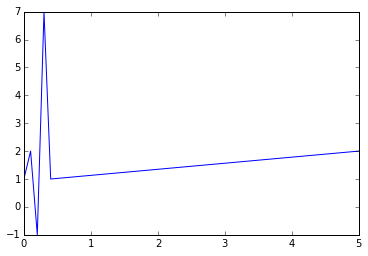

In [6]:
plt.plot([0.0,0.1,0.2,0.3,0.4, 5],[1, 2, -1 , 7, 1, 2])

La función `plot` recibe una sola lista (si queremos especificar los valores *y*) o dos listas (si especificamos *x* e *y*). Naturalmente si especificamos dos listas ambas tienen que tener la misma longitud.

La tarea más habitual a la hora de trabajar con matplotlib es representar una función. Lo que tendremos que hacer es definir un dominio y evaluarla en dicho dominio. Por ejemplo:

$$ f(x) = e^{-x^2} $$

In [4]:
def f(x):
    return np.exp(-x**2)

Definimos el dominio con la función `np.linspace`, que crea un vector de puntos equiespaciados:

In [5]:
x = np.linspace(-1,3,100)

Y representamos la función:

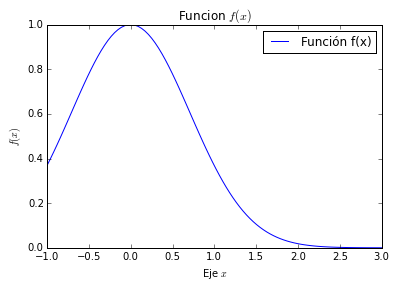

In [6]:
plt.plot(x, f(x), label="Función f(x)")
plt.xlabel("Eje $x$")
plt.ylabel("$f(x)$")
plt.legend()
plt.title("Funcion $f(x)$")

Notamos varias cosas:

* Con diversas llamadas a funciones dentro de `plt.` se actualiza el gráfico *actual*. Esa es la forma de trabajar con la interfaz pyplot.
* Podemos añadir etiquetas, y escribir $\LaTeX$ en ellas. Tan solo hay que encerrarlo entre signos de dólar $$.
* Añadiendo como argumento `label` podemos definir una leyenda.

### Personalización

La función `plot` acepta una serie de argumentos para personalizar el aspecto de la función. Con una letra podemos especificar el color, y con un símbolo el tipo de línea.

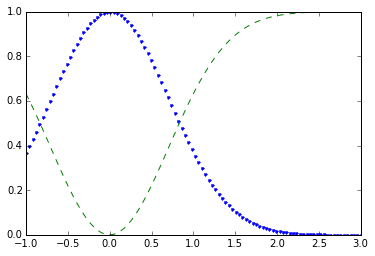

In [7]:
plt.plot(x, f(x), 'b.')
plt.plot(x, 1-f(x), 'g--')

In [24]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot lines and/or markers to the
    :class:`~matplotlib.axes.Axes`.  *args* is a variable length
    argument, allowing for multiple *x*, *y* pairs with an
    optional format string.  For example, each of the following is
    legal::
    
        plot(x, y)        # plot x and y using default line style and color
        plot(x, y, 'bo')  # plot x and y using blue circle markers
        plot(y)           # plot y using x as index array 0..N-1
        plot(y, 'r+')     # ditto, but with red plusses
    
    If *x* and/or *y* is 2-dimensional, then the corresponding columns
    will be plotted.
    
    An arbitrary number of *x*, *y*, *fmt* groups can be
    specified, as in::
    
        a.plot(x1, y1, 'g^', x2, y2, 'g-')
    
    Return value is a list of lines that were added.
    
    By default, each line is assigned a different color specified by a
    'color cycle'.  To change this behavior, you can 

Esto en realidad son códigos abreviados, que se corresponden con argumentos de la función `plot`:

In [3]:
plt.plot(x, f(x), color='red', linestyle='', marker='o')
plt.plot(x,1-f(x), c='g', ls='--')

NameError: name 'x' is not defined

La lista de posibles argumentos y abreviaturas está disponible en la documentación de la función `plot` http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot.

### Más personalización, pero a lo loco

Desde matplotlib 1.4 se puede manipular fácilmente la apariencia de la gráfica usando **estilos**. Para ver qué estilos hay disponibles, escribiríamos `plt.style.available`.

In [27]:
plt.style.available

['dark_background', 'ggplot', 'grayscale', 'fivethirtyeight', 'bmh']

No hay muchos pero podemos crear los nuestros. Para activar uno de ellos, usamos `plt.style.use`.

In [28]:
plt.style.use("ggplot") #afecta a todos los plots

<div class="alert alert-warning">No he sido capaz de encontrar una manera fácil de volver a la apariencia por defecto en el notebook. A ver qué dicen los desarrolladores (https://github.com/ipython/ipython/issues/6707) ¡pero de momento si quieres volver a como estaba antes toca reiniciar el notebook!</div>

Para emplear un estilo solo a una porción del código, creamos un bloque `with plt.style.context("STYLE")`:

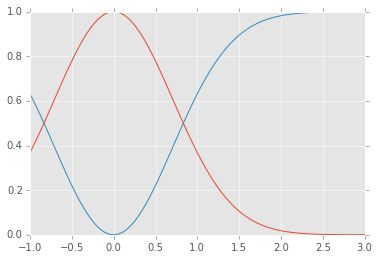

In [8]:
with plt.style.context('ggplot'):
    plt.plot(x,f(x))
    plt.plot(x, 1-f(x))

Y hay otro tipo de personalización más loca todavía:

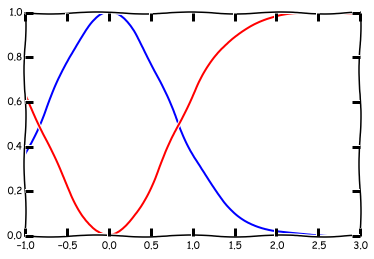

In [9]:
with plt.xkcd():
    plt.plot(x, f(x))
    plt.plot(x, 1-f(x))

¡Nunca imitar a XKCD fue tan fácil! http://xkcd.com/353/

### Otros tipo de gráficas

La función `scatter` muestra una nube de puntos, con posibilidad de variar también el tamaño y el color.

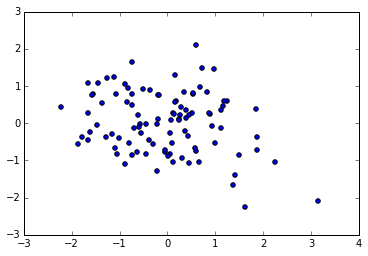

In [12]:
N = 100
x = np.random.randn(N)
y = np.random.randn(N)

plt.scatter(x, y)

Con `s` y `c` podemos modificar el tamaño y el color respectivamente. Para el color, a cada valor numérico se le asigna un color a través de un *mapa de colores*; ese mapa se puede cambiar con el argumento `cmap`. Esa correspondencia se puede visualizar llamando a la función `colorbar`.

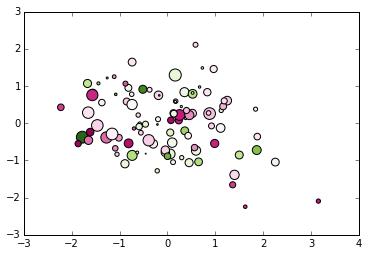

In [14]:
s = np.abs(50+50 * np.random.randn(N))
c = np.random.randn(N)

plt.scatter(x, y, s=s, c=c, cmap=plt.cm.PiYG)

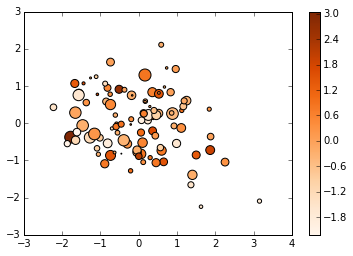

In [16]:
plt.scatter(x,y,s=s,c=c, cmap=plt.cm.Oranges)
plt.colorbar()

matplotlib trae por defecto muchos mapas de colores. En las SciPy Lecture Notes dan una lista de todos ellos (http://scipy-lectures.github.io/intro/matplotlib/matplotlib.html#colormaps)

![matplotlib colormaps](../static/plot_colormaps.png)

La función `contour` se utiliza para visualizar las curvas de nivel de funciones de dos variables y está muy ligada a la función `np.meshgrid`. Veamos un ejemplo:

$$f(x) = x^2 - y^2$$

In [17]:
def f(x,y):
    return x**2 - y**2

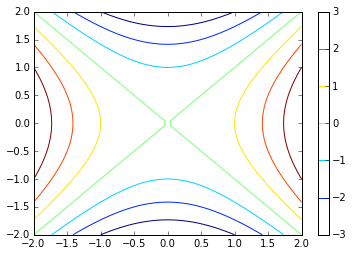

In [18]:
x = np.linspace(-2,2)
y = np.linspace(-2,2)
xx, yy = np.meshgrid(x,y)
zz = f(xx,yy)

plt.contour(xx,yy,zz)
plt.colorbar()

La función `contourf` es casi idéntica pero rellena el espacio entre niveles. Podemos especificar manualmente estos niveles usando el cuarto argumento:

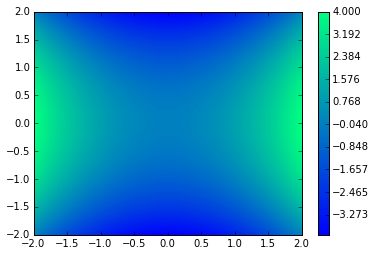

In [21]:
plt.contourf(xx,yy,zz, np.linspace(-4,4,100), cmap=plt.cm.winter)
plt.colorbar()

Para guardar las gráficas en archivos aparte podemos usar la función `plt.savefig`. matplotlib usará el tipo de archivo adecuado según la extensión que especifiquemos. Veremos esto con más detalle cuando hablemos de la interfaz orientada a objetos.

### Varias figuras

Podemos crear figuras con varios sistemas de ejes, pasando a `subplot` el número de filas y de columnas.

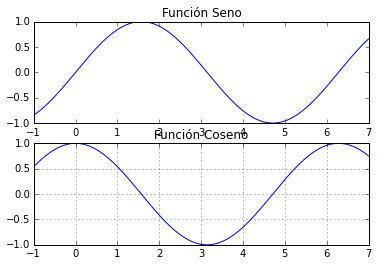

In [22]:
x = np.linspace(-1,7,1000)

fig = plt.figure()
plt.subplot(211) # subplot(2,1,1) en MATLAB
plt.plot(x, np.sin(x))
plt.grid(False)
plt.title("Función Seno")

plt.subplot(212)
plt.plot(x, np.cos(x))
plt.grid(True)
plt.title("Función Coseno")

<div class="alert alert-info">¿Cómo se ajusta el espacio entre gráficas para que no se solapen los textos? Buscamos en Google "plt.subplot adjust" en el primer resultado tenemos la respuesta http://stackoverflow.com/a/9827848</div>

Como hemos guardado la figura en una variable, puedo recuperarla más adelate y seguir editándola.

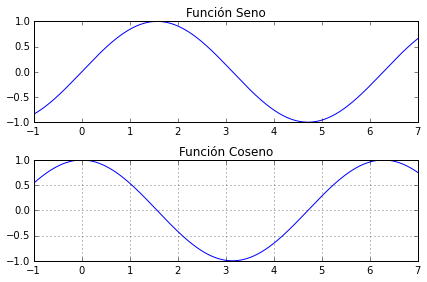

In [23]:
fig.tight_layout()
fig

<div class="alert alert-warning">Si queremos manipular la figura una vez hemos abandonado la celda donde la hemos definido, tendríamos que utilizar la interfaz orientada a objetos de matplotlib. Es un poco lioso porque algunas funciones cambian de nombre, así que en este curso no la vamos a ver.

**Ejercicio**

Crear una función que represente gráficamente esta expresión:

$$\sin(2 \pi f_1 t) + \sin(2 \pi f_2 t)$$

Siendo $f_1$ y $f_2$ argumentos de entrada (por defecto $10$ y $100$) y $t \in [0, 0.5]$. Además, debe mostrar:

* leyenda,
* título "Dos frecuencias",
* eje x "Tiempo ($t$)"

y usar algún estilo de los disponibles.

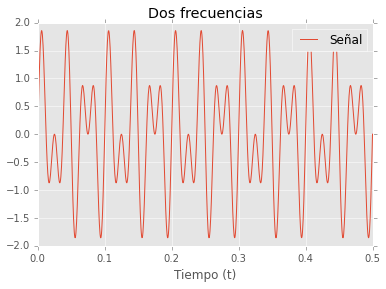

In [25]:
def frecuencias(f1=10,f2=100):
    t = np.linspace(0,0.5,1000)
    signal = np.sin(2* np.pi *f1 * t) + np.sin(2*np.pi*f2*t)
    with plt.style.context("ggplot"):
        plt.plot(t, signal, label="Señal")
        plt.xlabel("Tiempo (t)")
        plt.title("Dos frecuencias")
        plt.legend()

frecuencias(f1= 50,f2=30)

**Ejercicio**

Representar las curvas de nivel de esta función:

$$g(x, y) = \cos{x} + \sin^2{y}$$

Para obtener este resultado:

![Ejercicio](../static/ejercicio_contour.png)

In [26]:
def g(x,y):
    return np.cos(x) + np.sin(y)**2

In [27]:
x = np.linspace(-2,3,1000)
y = np.linspace(-2,3,1000)

xx, yy = np.meshgrid(x,y)

zz = g(xx,yy)

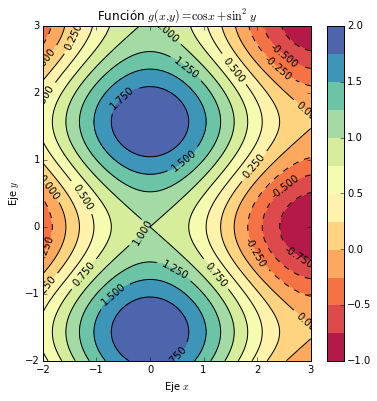

In [31]:
fig = plt.figure(figsize=(6,6)) # Ajustar el tamaño de la figura

cs = plt.contourf(xx,yy,zz,np.linspace(-1,2,13), cmap= plt.cm.Spectral) 

plt.colorbar()

cs = plt.contour(xx,yy,zz, np.linspace(-1,2,13), colors='k')

plt.clabel(cs) # Crear las etiqueras sobres las lineas

plt.xlabel("Eje $x$")
plt.ylabel("Eje $y$")
plt.title("Función $g(x,y) = \cos{x} + \sin^2{y}$")

### El truco final: componentes interactivos

No tenemos mucho tiempo pero vamos a ver algo interesante que se ha introducido hace poco en el notebook: **componentes interactivos**.

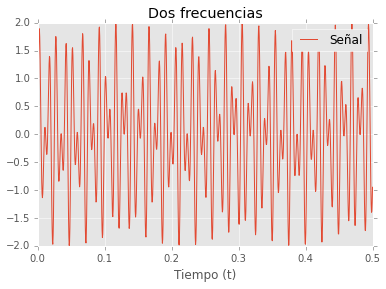

In [32]:
from ipywidgets import interact

interact(frecuencias, f1 = (10.0,200.0), f2=(10.0,200.0))

In [35]:
def prueba(a=True):
    if(a):
        print("True")
    else:
        print("False")
        
interact(prueba, a=True)

True


## Referencias

* Guía de matplotlib para principiantes http://matplotlib.org/users/beginner.html
* Tutorial de matplotlib en español http://pybonacci.org/tag/tutorial-matplotlib-pyplot/
* Referencia rápida de matplotlib http://scipy-lectures.github.io/intro/matplotlib/matplotlib.html#quick-references